# 线性回归

## 导入实验所需包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 定义模型
### 参数初始化
w与b的初始化
### 定义预测函数与损失函数
预测函数为f(x)=w^T * x_i + b，损失函数为均方误差
### 模型训练
最小二乘法优化
### 模型保存与加载
使用numpy读取与保存模型参数
### 模型预测与评估
评估使用均方误差

In [2]:
# 使用最小二乘法实现线性回归
class LinearRegression:
    def __init__(self) -> None:
        self.w = None
        self.b = None

    # 最小二乘法训练
    def fit(self, X, y):
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.b = self.w[-1]
        self.w = self.w[:-1]
    
    # 预测
    def predict(self, X):
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        return X.dot(np.hstack([self.w, self.b]))
    
    # 加载模型
    def load(self, path):
        data = np.load(path)
        self.w = data['w']
        self.b = data['b']

    # 保存模型
    def save(self, path):
        np.savez(path, w=self.w, b=self.b)
    
    # MSE评估
    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

## 数据处理
### 获取数据集
path = dataset/housing-data.csv
### 缺省值处理
使用均值填充
### 特征标准化
使用Z-score标准化
### 分割数据集
80%的数据作为训练集，20%的数据作为测试集

In [3]:
# 数据处理
path = 'dataset/housing-data.csv'
# 全部特征
def data_process_full():
    # 读取数据
    data = pd.read_csv(path)
    # 均值填充缺省值
    data = data.fillna(data.mean())
    # Z-Score标准化
    for col in data.columns[:-1]:
        data[col] = (data[col] - data[col].mean()) / data[col].std()
    # 分割数据集
    data = np.array(data)
    np.random.shuffle(data)
    X = data[:, :-1]
    y = data[:, -1]
    X_train = X[:int(0.8 * len(X))]
    y_train = y[:int(0.8 * len(y))]
    X_test = X[int(0.8 * len(X)):]
    y_test = y[int(0.8 * len(y)):]
    return X_train, y_train, X_test, y_test

# 部分特征
def data_process_part():
    # 读取数据
    data = pd.read_csv(path)
    # 均值填充缺省值
    data = data.fillna(data.mean())
    # Z-Score标准化
    for col in data.columns[:-1]:
        data[col] = (data[col] - data[col].mean()) / data[col].std()
    # 分割数据集
    data = np.array(data)
    np.random.shuffle(data)
    X = data[:, [0, 1, 2, 3, 4, 5]]
    y = data[:, -1]
    X_train = X[:int(0.8 * len(X))]
    y_train = y[:int(0.8 * len(y))]
    X_test = X[int(0.8 * len(X)):]
    y_test = y[int(0.8 * len(y)):]
    return X_train, y_train, X_test, y_test

## 主函数

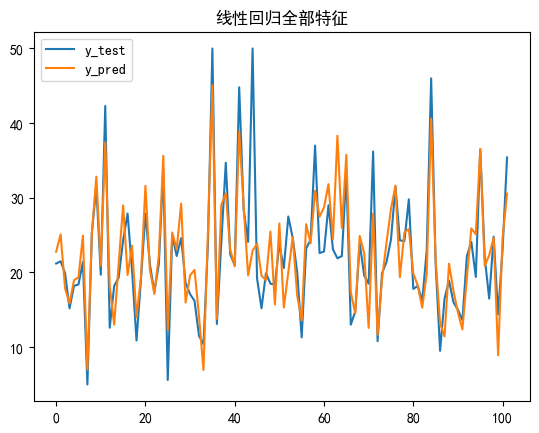

全部特征MSE: 22.215766722868906


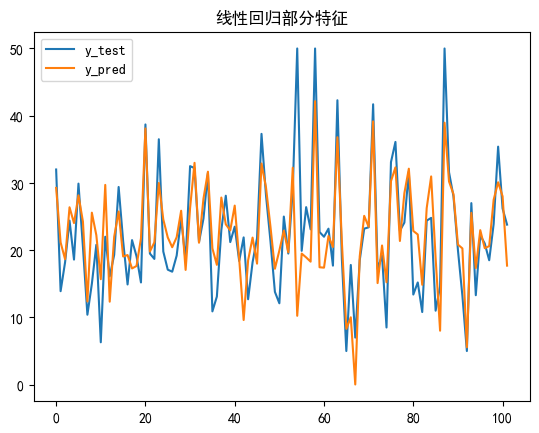

部分特征MSE: 37.063954447819135


In [6]:
# 全部特征
X_train, y_train, X_test, y_test = data_process_full()
# 实例化模型
model = LinearRegression()
# 训练模型
model.fit(X_train, y_train)
# 保存模型
model.save('model/linear_model_implement_full.npz')
# MSE评估
y_pred = model.predict(X_test)

# 将预测与实际值可视化
plt.title('线性回归全部特征')
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()
print('全部特征MSE:', model.mse(y_test, y_pred))

# 部分特征
X_train, y_train, X_test, y_test = data_process_part()
# 实例化模型
model = LinearRegression()
# 训练模型
model.fit(X_train, y_train)
# 保存模型
model.save('model/linear_model_implement_part.npz')
# MSE评估
y_pred = model.predict(X_test)

# 设置显示中文字体
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]

# 将预测与实际值可视化
plt.title('线性回归部分特征')
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()
print('部分特征MSE:', model.mse(y_test, y_pred))

# 逻辑回归
## 导入实验所需包

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 定义模型
### 参数初始化
w与b的初始化
### 定义预测函数与损失函数
预测函数为f(x)= 1 / (1 + e ^ -((w ^ T)x +))，损失函数为极大似然估计
### 模型训练
极大似然法优化
### 模型保存与加载
使用numpy读取与保存模型参数
### 模型预测与评估
评估使用正确率和召回率

In [8]:
# 使用极大似然法实现线性回归
class LogisticRegression:
    def __init__(self) -> None:
        self.w = None
        self.b = None

    # sigmoid函数
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # 损失函数
    def cost(self, hx, y):
        return -y * np.log(hx) - (1 - y) * np.log(1 - hx)

    # 梯度下降
    def gradient_descent(self, X, y, lr=0.01):
        y_pred = self.sigmoid(X.dot(self.w))
        grad = X.T.dot(y_pred - y)
        return lr * grad

    # 训练模型
    def fit(self, X, y, lr=0.01, max_iter=1000):
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        self.w = np.random.randn(X.shape[1])
        for i in range(max_iter):
            self.w -= self.gradient_descent(X, y, lr)
    
    # 预测
    def predict(self, X):
        X = np.hstack([X, np.ones((X.shape[0], 1))])
        return self.sigmoid(X.dot(self.w))
    
    # 加载模型
    def load(self, path):
        data = np.load(path)
        self.w = data['w']
        self.b = data['b']

    # 保存模型
    def save(self, path):
        np.savez(path, w=self.w, b=self.b)
    
    # 准确率
    def accuracy(self, y_true, y_pred):
        y_pred = np.where(y_pred > 0.5, 1, 0)
        return np.mean(y_true == y_pred)

    # recall    
    def recall(self, y_true, y_pred):
        y_pred = np.where(y_pred > 0.5, 1, 0)
        return np.sum(y_true * y_pred) / np.sum(y_true)

## 数据处理
### 获取数据集
path = dataset/breast-cancer-wisconsin.data
### 缺省值处理
使用均值填充
### 特征标准化
使用Z-score标准化
### 分割数据集
80%的数据作为训练集，20%的数据作为测试集

In [9]:
# 数据处理
path = 'dataset/breast-cancer-wisconsin.data'\
# 全部特征
def data_process_full():
    # 将data加入第一行列表头'Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'
    data = pd.read_csv(path, header=None, names= ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])
    # 去掉'Sample code number'列
    data = data.drop('Sample code number', axis=1)
    # 0填充'?'
    data = data.replace('?', 0)
    # 将所有数据转换为int类型
    data = data.astype(int)
    # Z-Score标准化
    for col in data.columns:
        data[col] = (data[col] - data[col].mean()) / data[col].std()
    # 分割数据集
    data = np.array(data)
    np.random.shuffle(data)
    X = data[:, 1:-1]
    y = data[:, -1]
    X_train = X[:int(0.8 * len(X))]
    y_train = y[:int(0.8 * len(y))]
    X_test = X[int(0.8 * len(X)):]
    y_test = y[int(0.8 * len(y)):]
    return X_train, y_train, X_test, y_test

# 部分特征
def data_process_part():
    # 将data加入第一行列表头'Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'
    data = pd.read_csv(path, header=None, names= ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])
    # 去掉'Sample code number'列
    data = data.drop('Sample code number', axis=1)
    # 0填充'?'
    data = data.replace('?', 0)
    # 将所有数据转换为int类型
    data = data.astype(int)
    # Z-Score标准化
    for col in data.columns:
        data[col] = (data[col] - data[col].mean()) / data[col].std()
    # 分割数据集
    data = np.array(data)
    np.random.shuffle(data)
    X = data[:, [1, 2, 3, 4, 5]]
    y = data[:, -1]
    X_train = X[:int(0.8 * len(X))]
    y_train = y[:int(0.8 * len(y))]
    X_test = X[int(0.8 * len(X)):]
    y_test = y[int(0.8 * len(y)):]
    return X_train, y_train, X_test, y_test

## 主函数

C:\Users\13107\AppData\Local\Temp\ipykernel_19108\2051046317.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


全部特征accuracy: 0.95
全部特征recall: 0.9074074074074074


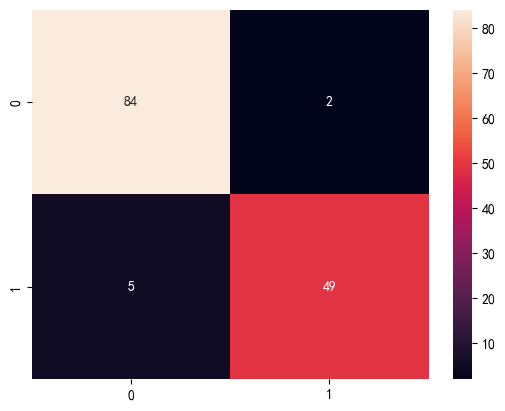

部分特征accuracy: 0.9285714285714286
部分特征recall: 0.8958333333333334


C:\Users\13107\AppData\Local\Temp\ipykernel_19108\2051046317.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


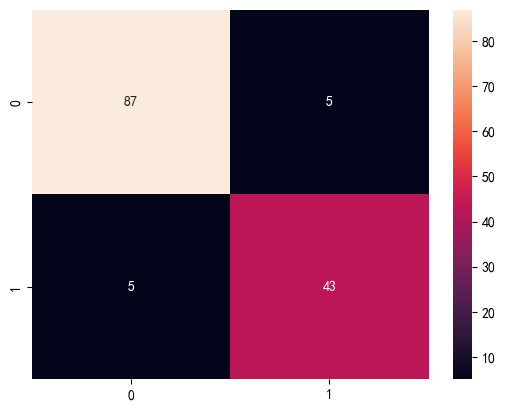

In [10]:
import seaborn as sns
# 全部特征
X_train, y_train, X_test, y_test = data_process_full()
# y=2 为benign, y=4 为malignant
# 实例化模型
model = LogisticRegression()
# 训练模型
model.fit(X_train, y_train, lr=0.01, max_iter=1000)
# 保存模型
model.save('model/logistic_model_implement_full.npz')
# 评估模型
y_pred = model.predict(X_test)
# y_pred转化为0,1
y_pred = np.where(y_pred > 0.5, 1, 0)
# 将y_test转化为0,1
y_test = np.where(y_test < 0, 0, 1)
# print(y_pred, y_test)
print('全部特征accuracy:', model.accuracy(y_test, y_pred))
print('全部特征recall:', model.recall(y_test, y_pred))

# 设置显示中文字体
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# 部分特征
X_train, y_train, X_test, y_test = data_process_part()
# y=2 为benign, y=4 为malignant
# 实例化模型
model = LogisticRegression()
# 训练模型
model.fit(X_train, y_train, lr=0.01, max_iter=1000)
# 保存模型
model.save('model/logistic_model_implement_part.npz')
# 评估模型
y_pred = model.predict(X_test)
# y_pred转化为0,1
y_pred = np.where(y_pred > 0.5, 1, 0)
# 将y_test转化为0,1
y_test = np.where(y_test < 0, 0, 1)
# print(y_pred, y_test)
print('部分特征accuracy:', model.accuracy(y_test, y_pred))
print('部分特征recall:', model.recall(y_test, y_pred))

# 混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()